In [2]:
## Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Rectangle
import seaborn as sns
import re
import numpy as np
import matplotlib.colors as mcolors
import networkx as nx  
import ast
from data_transform import extract_hold_data, get_coordinates, color_mapping, compute_hold_id, generate_id_mapping, get_numeric_id, map_hold_skus

SyntaxError: invalid syntax (2087928133.py, line 13)

In [16]:
df_climbs_angles = pd.read_csv('data/csvs/climbs_with_angles.csv', low_memory=False)
df_climbs = pd.read_csv('data/csvs/climbs.csv')
df_holes = pd.read_csv('data/csvs/holes.csv')
df_colors = pd.read_csv('data/csvs/placement_roles.csv')
df_vscale = pd.read_csv('data/csvs/vscale.csv')

kilter_xlim = 144
kilter_ylim = 156

In [17]:
# df_climbs['ids'] = df_climbs['frames'].apply(lambda x: extract_hold_data(x)[0::2])
# df_climbs['colors'] = df_climbs['frames'].apply(lambda x: extract_hold_data(x)[1::2])
# df_climbs['coordinates'] = df_climbs['ids'].apply(lambda x: get_coordinates(x, df_holes))
# df_climbs['normalized_coordinates'] = df_climbs['ids'].apply(lambda x: get_coordinates(x, df_holes, normalize=True))
# color_mapping = df_colors.set_index('id')['full_name'].to_dict()
# df_climbs['hold_type'] = df_climbs.colors.apply(
#         lambda x: [
#             color_mapping.get(color) 
#             if color else None
#             for color in x
#         ]
#     )

In [18]:
def plot_climb_by_id(id=1):   
    hold_pos = np.asarray(ast.literal_eval(df_climbs['coordinates'][id]))    
    color_ids = ast.literal_eval(df_climbs['colors'][id])
    colors = [color_mapping(color_id, df_colors) for color_id in color_ids]
    print("Colors: ", colors)
    x_limits = [0, kilter_xlim]
    y_limits = [0, kilter_ylim]
    plt.gca().add_patch(Rectangle((x_limits[0], y_limits[0]), x_limits[1]-x_limits[0], y_limits[1]-y_limits[0], facecolor='grey', zorder=0))
    img1 = mpimg.imread('data/pngs/kilter_large_holds.png')  
    plt.imshow(img1, extent=[x_limits[0], x_limits[1], y_limits[0], y_limits[1]], zorder=1)  
    x = hold_pos[:, 0]
    y = hold_pos[:, 1]  
    plt.scatter(x, y, facecolors='none', edgecolors=colors, s=100, linewidth=1.5, zorder=3)
    plt.axis('off')
    plt.xlim(x_limits)
    plt.ylim(y_limits)
    plt.gca().set_title(df_climbs['name'][id], fontsize=18)
    
    plt.show()

In [19]:
def plot_stats(id=1):
    subset_df = df_climbs_angles.loc[df_climbs_angles['uuid'] == df_climbs['uuid'][id]]
    subset_df = subset_df.sort_values(by='angle')
    subset_df['display_difficulty'] = subset_df['display_difficulty'].astype(int)
    df_vscale['difficulty'] = df_vscale['difficulty'].astype(int)
    subset_df = pd.merge(subset_df, df_vscale, 
                         left_on='display_difficulty', right_on='difficulty', 
                         how='left')
    sns.set_style("whitegrid")
    sns.set_context("talk")  
    subset_df['boulder_name'] = pd.Categorical(subset_df['boulder_name'], 
                                               categories=df_vscale['boulder_name'], 
                                               ordered=True)
    subset_df = subset_df.sort_values('boulder_name')

    boulder_names_present = subset_df['boulder_name'].unique()
    custom_palette = sns.color_palette("viridis", n_colors=len(boulder_names_present))
    color_mapping = dict(zip(boulder_names_present, custom_palette))
    # Create the plot
    fig, ax = plt.subplots(figsize=(7, 4))
    sns.scatterplot(data=subset_df, 
                    x='angle', 
                    y='ascensionist_count', 
                    hue="boulder_name",
                    palette=color_mapping,
                    hue_order=boulder_names_present,  # Use boulder names from subset_df
                    s=100,  
                    edgecolor='white', 
                    linewidth=0.5, 
                    ax=ax)

    sns.lineplot(data=subset_df, x='angle', y='ascensionist_count', color='gray', linestyle='dashed', ax=ax)
    ax.set_title('Ascensionist Count vs. Angle', fontsize=18, pad=10)
    ax.set_xlabel('Angle', fontsize=16)
    ax.set_ylabel('Ascensionist Count', fontsize=16)
    legend = ax.legend(title='Difficulty', bbox_to_anchor=(1, 1.2), loc='upper left', frameon=False)
    plt.setp(legend.get_title(), fontsize=14)  
    plt.setp(legend.get_texts(), fontsize=12)  
    plt.tight_layout()
    plt.show()


Colors:  ['#FFA500', '#FFA500', '#00DD00', '#00DD00', '#00FFFF', '#00FFFF', '#00FFFF', '#00FFFF', '#00FFFF', '#00FFFF', '#00FFFF', '#FF00FF']


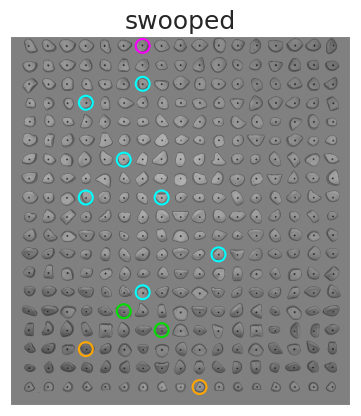

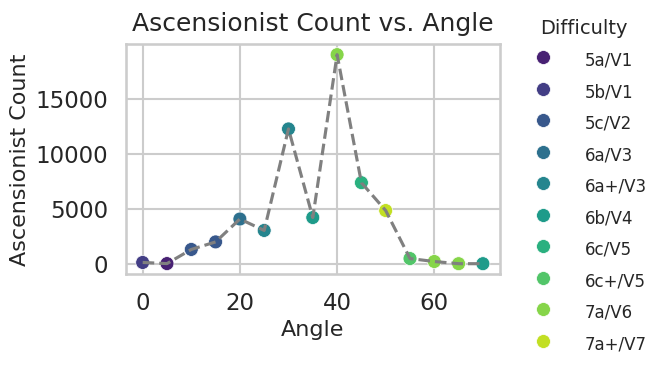

In [20]:
id = 1
plot_climb_by_id(id)
plot_stats(id)

Colors:  ['#FFA500', '#FFA500', '#00DD00', '#00DD00', '#00FFFF', '#00FFFF', '#FFA500', '#00FFFF', '#00FFFF', '#00FFFF', '#00FFFF', '#FF00FF']


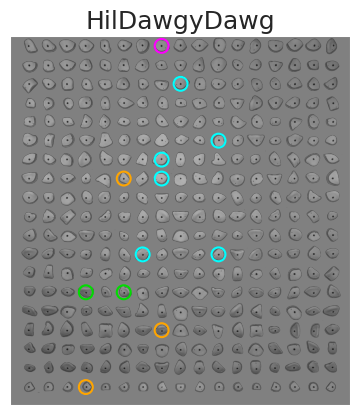

[[32, 8], [64, 32], [32, 48], [48, 48], [56, 64], [88, 64], [48, 96], [64, 96], [64, 104], [88, 112], [72, 136], [64, 152]]


In [21]:
id = df_climbs.query("name == 'Boot Spur'").index.to_flat_index()[0]
plot_climb_by_id(5)
test = df_climbs['coordinates'][5]
print(test)



In [22]:
df_climbs_angles.loc[df_climbs_angles['name'] == 'swooped'][["display_difficulty", "angle", "ascensionist_count"]]

,display_difficulty,angle,ascensionist_count
15,14.6897,0,116
16,13.2143,5,14
17,15.9723,10,1299
18,15.9995,15,1983
19,16.0475,20,4064
20,17.9323,25,3026
21,17.9601,30,12250
22,18.0503,35,4198
23,22.0000,40,18999
24,20.0291,45,7366


## Some general plots on hold types and angels of the holds

/tmp/ipykernel_24505/3500593419.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sns.heatmap(skus_grid.applymap(lambda x: sku_map[x]), cmap='hsv', cbar=True)


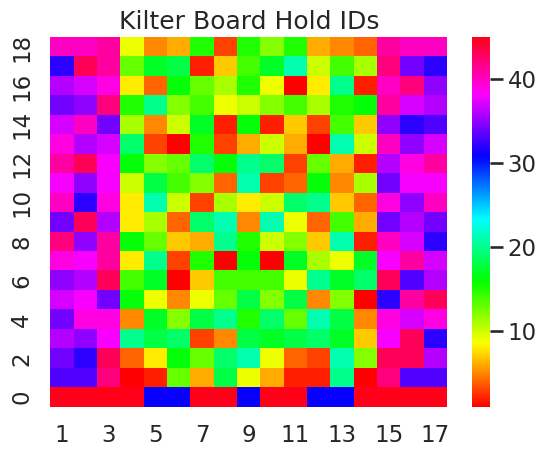

In [23]:
skus_grid = pd.read_csv('data/csvs/KB_12x12_skus_only.csv').iloc[::-1]
angle_grid = pd.read_csv('data/csvs/KB_12x12_angles_only.csv').iloc[::-1]
skus = pd.read_csv('data/csvs/KB_skus.csv')
skus.SKU.unique()
sku_map = dict(zip(skus.SKU.unique(), range(1, len(skus.SKU.unique())+1)))
plt.title('Kilter Board Hold IDs')

sns.heatmap(skus_grid.applymap(lambda x: sku_map[x]), cmap='hsv', cbar=True)
plt.show()

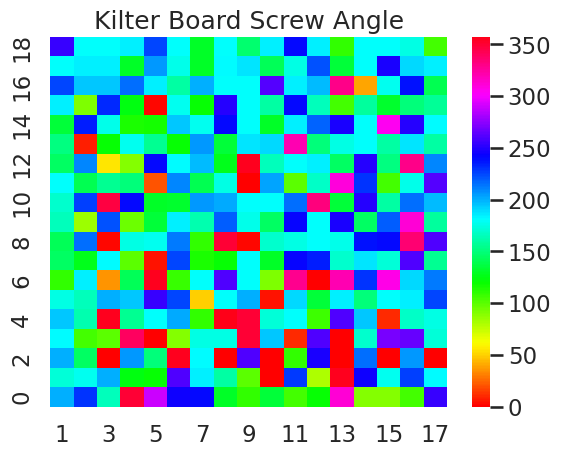

In [24]:
plt.title('Kilter Board Screw Angle')
sns.heatmap(angle_grid, cmap='hsv', cbar=True)
plt.show()

## Heatmap of used used holds per difficulty

<Axes: xlabel='difficulty', ylabel='Count'>

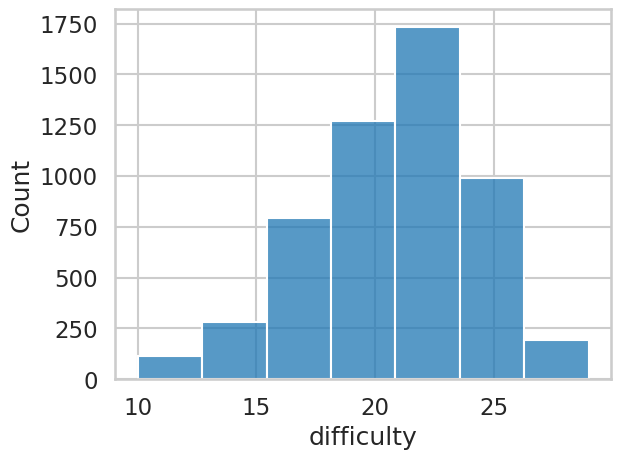

In [25]:
df_train = pd.read_csv('data/csvs/train.csv')
sns.histplot(df_train.difficulty, bins=7)

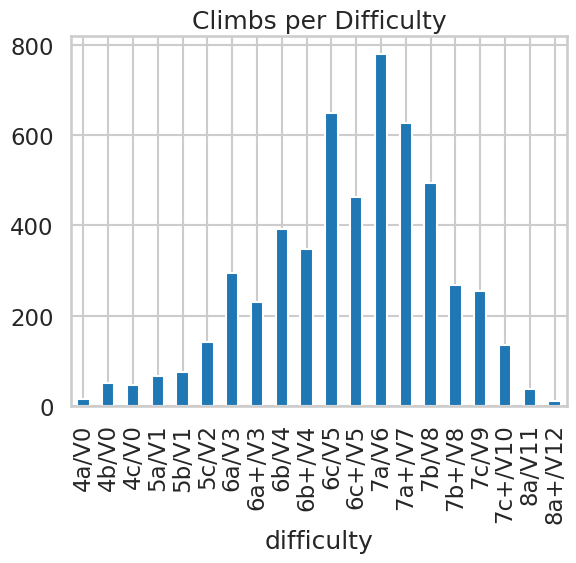

In [26]:
ax = df_train.difficulty.apply(lambda x: np.round(x)).value_counts().sort_index().plot(kind='bar')
ax.set_title('Climbs per Difficulty')
ax.set_xticklabels(df_vscale.boulder_name.values[9:-10])
plt.show()

In [48]:
df_train

,uuid,coordinates,nodes,hold_type,difficulty
0,D0E5387D5B974D38B4E93FC4DFD61EF6,"[[56, 24], [64, 32], [32, 40], [64, 48], [32, ...","[176, 204, 95, 206, 97, 181, 236, 238, 129, 26...","['Foot Only', 'Foot Only', 'Foot Only', 'Foot ...",16.0
1,F01419E12672459396CA62E3655ABC46,"[[80, 8], [32, 24], [64, 32], [48, 40], [56, 4...","[256, 93, 204, 150, 179, 291, 101, 211, 158, 1...","['Foot Only', 'Foot Only', 'Start', 'Start', '...",22.0
2,A9FCD0BC271D402F8C4C80DE885B7BCA,"[[32, 16], [48, 40], [48, 48], [96, 72], [48, ...","[92, 150, 151, 319, 155, 375, 267, 269, 297, 2...","['Foot Only', 'Start', 'Start', 'Foot Only', '...",20.0
3,bf0db71d0d674289beef46e226216bf6,"[[72, 8], [40, 40], [72, 40], [72, 48], [56, 6...","[229, 123, 233, 234, 181, 154, 292, 212, 240, ...","['Foot Only', 'Foot Only', 'Start', 'Foot Only...",15.0
4,18E34282FDF54D6BA0A3A7B57F0F2689,"[[32, 8], [56, 24], [40, 40], [48, 48], [96, 5...","[91, 176, 123, 151, 317, 181, 321, 186, 245]","['Foot Only', 'Foot Only', 'Start', 'Start', '...",23.0
...,...,...,...,...,...
5374,d8239079830240c282ed5d229d1f764d,"[[16, 56], [48, 56], [24, 80], [48, 96], [16, ...","[42, 152, 73, 157, 48, 133, 79, 217, 136, 55, ...","['Start', 'Middle', 'Middle', 'Middle', 'Middl...",22.0
5375,e020c7c75bef402c959d5691031c29cc,"[[8, 8], [8, 40], [40, 72], [24, 88], [56, 120...","[9, 13, 127, 74, 188, 271, 247, 168, 252, 336]","['Middle', 'Start', 'Middle', 'Middle', 'Middl...",21.0
5376,e0f83ff1eab84fa4994c910878d4779a,"[[16, 16], [40, 40], [16, 56], [16, 80], [24, ...","[37, 123, 42, 45, 73, 49, 163, 247, 31, 255]","['Foot Only', 'Start', 'Start', 'Middle', 'Mid...",24.0
5377,e626293fe07e4c42b0c5dd11d228743a,"[[112, 56], [96, 64], [80, 96], [136, 96], [12...","[372, 318, 267, 460, 437, 468, 276, 444, 392, ...","['Start', 'Middle', 'Middle', 'Middle', 'Finis...",26.0


In [67]:
from collections import defaultdict

def node_count(node_column):
    dict_node_count = defaultdict(int)
    for row in node_column:
        for entry in ast.literal_eval(row):
            dict_node_count[entry] += 1
    return dict_node_count


df_train.difficulty = df_train.difficulty.apply(np.round)
df_nodes = pd.read_csv('data/csvs/nodes.csv')
# Creating a mapping for difficulties to readable labels
difficulty_mapping = {
    tuple(range(10, 13)): "4",
    tuple(range(13, 16)): "5",
    tuple(range(16, 19)): "6a-6b",
    tuple(range(19, 22)): "6b+-6c+",
    tuple(range(22, 25)): "7a-7b",
    tuple(range(25, 28)): "7b+-7c",
    tuple(range(28, 31)): ">8a"
}

all_node_counts = {}

for diff_range, label in difficulty_mapping.items():
    relevant_df = df_train[df_train.difficulty.isin(diff_range)]
    # print(relevant_df.nodes[0])
    all_node_counts[label] = node_count(relevant_df.nodes)

In [109]:
# import matplotlib.pyplot as plt
# import numpy as np
# import seaborn as sns
# from scipy.ndimage import gaussian_filter

# difficulties = ["5", "6a-6b", "6b+-6c+", "7a-7b", "7b+-7c", ">8a"]
# fig, axs = plt.subplots(2, 3, figsize=(20, 12))  
# fig.suptitle('Hold Distribution per Difficulty Level', fontsize=20)
# axs = axs.flatten()  

# for i, difficulty in enumerate(difficulties):
#     valid_keys = [k for k in all_node_counts[difficulty].keys() if k is not None and k in df_nodes.index]
#     try:
#         coordinates = df_nodes.loc[valid_keys][['x', 'y']].values
#     except KeyError as ke:
#         print(f"KeyError: {ke}")    
#     values = np.array(list(all_node_counts[difficulty].values()))
#     print(len(coordinates), len(values))
#     grid_size = 18  
#     x_max, y_max = np.max(coordinates, axis=0)
#     x_bins = np.linspace(0, x_max, grid_size)
#     y_bins = np.linspace(0, y_max, grid_size)

#     grid, _, _ = np.histogram2d(coordinates[:,0], coordinates[:,1], bins=[x_bins, y_bins], weights=values)

#     # Applying Gaussian smoothing
#     sigma = 1  # Standard deviation of the Gaussian filter. You might adjust this value.
#     smoothed_grid = gaussian_filter(grid, sigma=sigma)
    
#     sns.heatmap(smoothed_grid.T, cmap='viridis', annot=False, ax=axs[i])
#     axs[i].set_title(f' {len(all_node_counts[difficulty].keys())} Climbs (Difficulty {difficulty})')
#     axs[i].set_xlabel('X-Coordinate')
#     axs[i].set_ylabel('Y-Coordinate')
#     axs[i].invert_yaxis()  

# plt.tight_layout()
# plt.show()

## How are the holds combined into a graph?
Lets look again at the most climbed problem SWOOPED by @jwebxl

In [69]:
df_climbs[['coordinates', 'hold_type']].loc[1]

coordinates    [[80, 8], [32, 24], [64, 32], [48, 40], [56, 4...
hold_type      ['Foot Only', 'Foot Only', 'Start', 'Start', '...
Name: 1, dtype: object

Now we can create a dictionary which stores additional information for each of the nodes/holds

In [70]:
df_nodes = pd.read_csv('data/csvs/nodes.csv')
df_nodes.loc[(df_nodes.x == 80) & (df_nodes.y == 8)]
# df_nodes['hold_type'] = df_nodes['name'].apply(lambda x: x.split('_')[0])

,name,x,y,sku,screw_angle,hold_type
256,L_10_1,80,8,KB-FD01,135.0,L


Lets create the node feature matrix as well as the graph matrix 

In [71]:
df_train = df_climbs[['uuid', 'coordinates', 'hold_type']].copy()
def get_index(coords):
    df_filtered = df_nodes.loc[(df_nodes.x == coords[0]) & (df_nodes.y == coords[1])]
    if not df_filtered.empty:
        return df_filtered.index[0]
    else:
        return None 
# df_train['nodes'] = df_train.coordinates.map(lambda x: ([get_index(coords) for coords in ast.literal_eval(x)]))
print(f'There are a total of {df_train.shape[0]} climbs in the dataset') 

There are a total of 7657 climbs in the dataset


Adding the difficulty column which will be out prediction target. For now lets select the difficulty at 40° as it is the most climbed --> most reliable data

In [76]:
def get_difficulty(uuid):
    df_filtered = df_climbs_angles.loc[(df_climbs_angles.angle == 40) & (df_climbs_angles.uuid == uuid)].display_difficulty
    if not df_filtered.empty:
        return df_filtered.values[0]
    else:
        return None 
# df_train['difficulty'] = df_train.uuid.map(lambda x: get_difficulty(x))
# # Removing climbs with missing nodes
df_train = df_train.dropna().reindex()
# df_train = df_train[df_train.nodes.apply(lambda x: None not in x)].reindex()
print(f'There are a total of {df_train.shape[0]} climbs in the dataset after removing climbs with missing nodes')

There are a total of 7657 climbs in the dataset after removing climbs with missing nodes


### GNN Input Data 

#### Graphs with respective difficulties

In [ ]:
df_train['hold_variant'] = df_train['hold_type']
df_train = df_train.drop(columns=['hold_type'])
df_train[['nodes', 'hold_variant', 'difficulty']].head()


NameError: name 'df_train' is not defined

In [ ]:
# df_train.to_csv('data/csvs/train.csv', index=False)

##### Node Feature Map

In [77]:
df_nodes[['x', 'y', 'sku', 'screw_angle', 'hold_type']]

,x,y,sku,screw_angle,hold_type
0,4,4,KB-FB05,0.0,S1
1,4,20,KB-FB03,0.0,S2
2,4,36,KB-FA07,0.0,S2
3,4,52,KB-FB03,0.0,S2
4,4,68,KB-FA06,0.0,S2
...,...,...,...,...,...
471,140,60,KB-FB03,0.0,S3
472,140,76,KB-FA06,0.0,S3
473,140,92,KB-FA07,0.0,S3
474,140,108,KB-FA07,0.0,S3


Processing Graph 4120: 100%|██████████| 11/11 [00:00<00:00, 8263.90it/s]


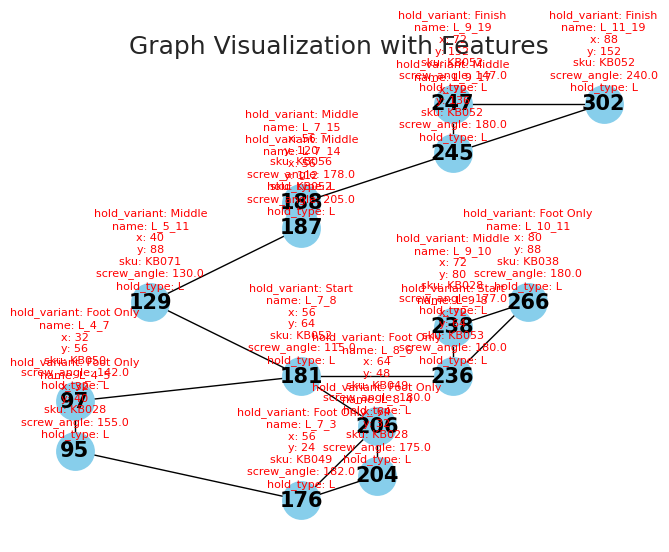

In [108]:
import networkx as nx
import ast
import numpy as np
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt

def data_load_in():
    df_train = pd.read_csv('data/csvs/train.csv')
    df_nodes = pd.read_csv('data/csvs/nodes.csv')
    return df_train, df_nodes

# If you use a list:
graphs = []

df_train, df_nodes = data_load_in()

for index, row in df_train.iterrows():
    G = nx.Graph()  # Initialize a new graph for this row
    
    coordinates = ast.literal_eval(row['coordinates'])
    nodes = ast.literal_eval(row['nodes'])
    hold_variants = ast.literal_eval(row['hold_type'])
    
    for i, coord in enumerate(coordinates):
        node_id = nodes[i]  # Removed redundant ast.literal_eval
        hold_variant = hold_variants[i]
        
        # Add nodes and node attributes to the graph
        node_features = df_nodes.loc[node_id].to_dict()
        G.add_node(node_id, 
                coordinates=coord, 
                hold_variant=hold_variant, 
                **node_features)

    # Calculate distances and create edges:
    for node_id in tqdm(G.nodes(data=True), desc=f"Processing Graph {index}", position=0):
        distances = {}
        for target_node_id in G.nodes(data=True):
            if node_id[0] != target_node_id[0]:
                dist = np.linalg.norm(np.array(node_id[1]['coordinates']) - np.array(target_node_id[1]['coordinates']))
                distances[target_node_id[0]] = dist
        # Get two nearest neighbors
        nearest_neighbors = sorted(distances.keys(), key=lambda x: distances[x])[:2]
        for neighbor in nearest_neighbors:
            G.add_edge(node_id[0], neighbor)
    
    # Optionally, visualize the graph:
    # ... [visualization code goes here] ...

    # Append the generated graph to the list
    graphs.append(G)


G = graphs[0]

# Positioning nodes using 'coordinates'
pos = nx.get_node_attributes(G, 'coordinates')

# Drawing nodes and edges
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=15, font_weight='bold')

# Annotating nodes with their features. Assuming features are 'hold_variant' and other node features
for node, attrs in G.nodes(data=True):
    # Creating a string of features for demonstration. 
    # Adjust accordingly to your use case.
    s = f"hold_variant: {attrs['hold_variant']}\n" + \
        "\n".join([f"{key}: {value}" for key, value in attrs.items() if key not in ['coordinates', 'hold_variant']])
    
    plt.annotate(s, (pos[node][0],pos[node][1]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='red')

plt.title('Graph Visualization with Features')
plt.show()
